### Visualisations for article for Kybernetika
Starting with all required imports and setting display to greyscale as Kybernetika is not printed in color.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('grayscale')

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

## Overview of all reference biases

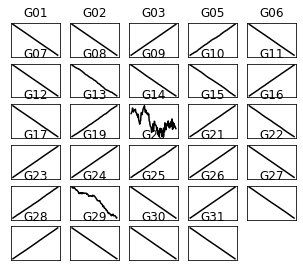

In [5]:
fig = plt.figure(figsize=cm2inch(13, 13))
fig.tight_layout(pad=0.8, h_pad=2)
fig.patch.set_facecolor('white')
skip = 0
ax = None 

for subplot, satellite in enumerate(range(1,31)):
    loaded = False
    satellite += skip
    reference = None
    while not loaded and satellite < 32:
        try:
            reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';')
            loaded = True
        except Exception:
            skip += 1
            satellite += 1
    
    if reference is not None:
        epochs = reference['Epoch'].to_numpy()[1:]
        epochs = np.arange(1, epochs.size*15, 15)
        bias_ref = reference['Clock_bias'].to_numpy()[1:]

        ax = fig.add_subplot(7, 5, subplot+1)
        ax.title.set_text(f'G{satellite:02d}')
        ax.set_yscale('linear')
        ax.plot(epochs, bias_ref)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.show()

### More precise visualisation of selected biases
G01 and G08 are examples of typical Rubidium satellites, G24 is Cesium based clock ensemble and G14 is only satellite in whole constalation that lacks distinct constant clock drift. I do not know 

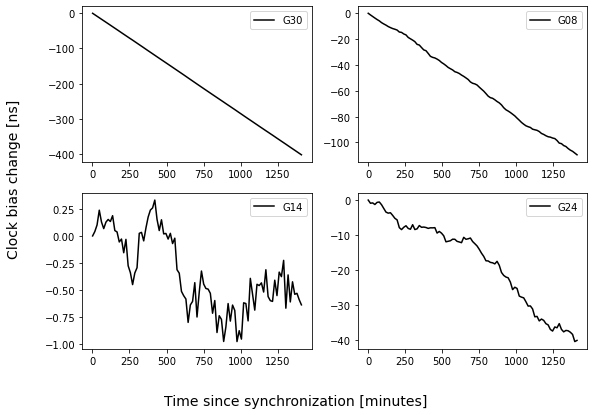

In [58]:
fig = plt.figure(figsize=cm2inch(23, 16))
fig.tight_layout(pad=2, h_pad=6)
fig.patch.set_facecolor('white')
skip = 0
ax = None 

sats = [30, 8, 14, 24]

for subplot, satellite in enumerate(sats):
    reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';') 
    epochs = reference['Epoch'].to_numpy()[1:]
    epochs = np.arange(1, epochs.size*15, 15)
    bias_ref = reference['Clock_bias'].to_numpy()[1:]
    bias_ref -= bias_ref[0]
    #bias_ref = np.abs(bias_ref)
    
    ax = fig.add_subplot(2, 2, subplot+1)
    #ax.title.set_text(f'G{satellite:02d}')
    ax.set_yscale('linear')
    ax.ticklabel_format(style='sci', useOffset=False)
    ax.plot(epochs, bias_ref, label=f'G{satellite:02d}')
    ax.legend()
fig.text(0.25, 0.01, 'Time since synchronization [minutes]', va='center', fontsize=14)
fig.text(0.01, 0.5, 'Clock bias change [ns]', va='center', rotation='vertical', fontsize=14)

plt.show()

### Same satellites but differentiated

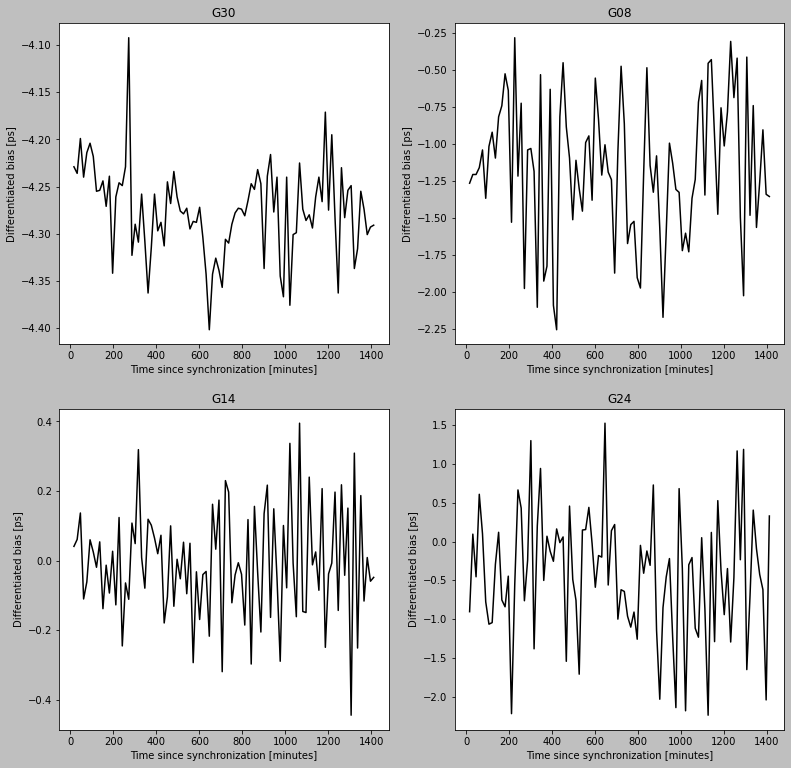

In [53]:
fig = plt.figure(figsize=(13, 13))
fig.tight_layout(pad=2, h_pad=2)
skip = 0
ax = None 

sats = [30, 8, 14, 24]

for subplot, satellite in enumerate(sats):
    reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';') 
    epochs = reference['Epoch'].to_numpy()[1:]
    epochs = np.arange(1, epochs.size*15, 15)
    bias_ref = reference['Clock_bias'].to_numpy()[1:]
    
    epochs = epochs[1:]
    bias_ref = np.diff(bias_ref)
    
    ax = fig.add_subplot(2, 2, subplot+1)
    ax.title.set_text(f'G{satellite:02d}')
    ax.set_xlabel('Time since synchronization [minutes]')
    ax.set_ylabel('Differentiated bias [ps]')
    ax.set_yscale('linear')
    ax.ticklabel_format(useOffset=False)
    ax.plot(epochs, bias_ref)
plt.show()

### Comparition of diferentiated and unnormalized

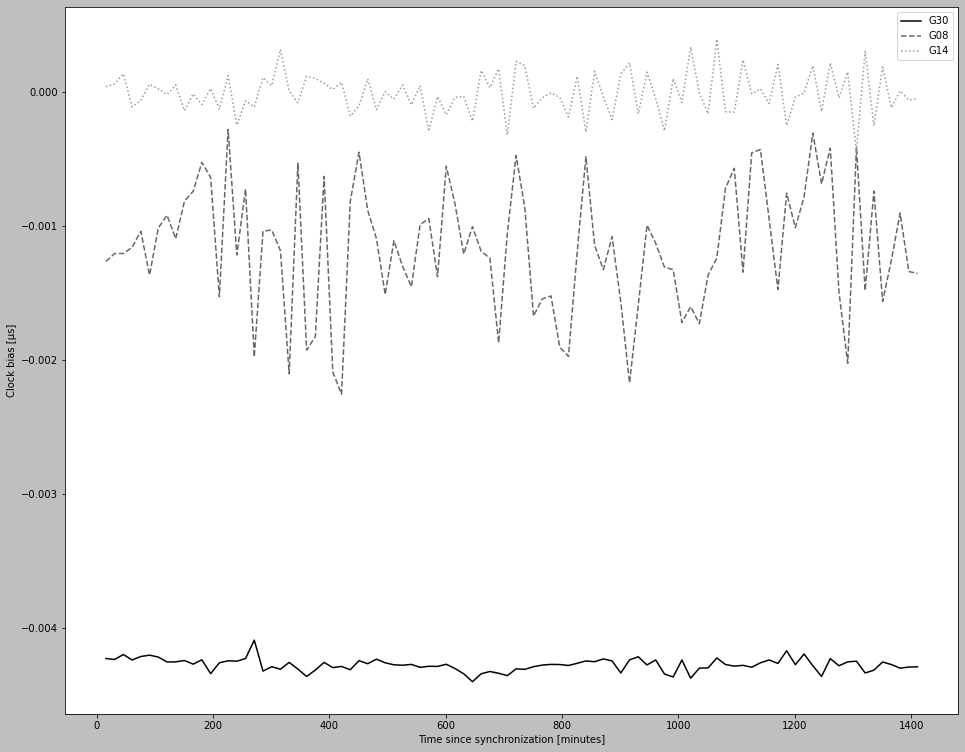

In [59]:
fig = plt.figure(figsize=(16, 13))
fig.tight_layout(pad=2, h_pad=2)
skip = 0
ax = fig.gca()
ax.ticklabel_format(useOffset=False) 

sats = [30, 8, 14]
l_types = ['solid', 'dashed', 'dotted']

for satellite, l_type in zip(sats, l_types):
    reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';')
    
    epochs = reference['Epoch'].to_numpy()[1:]
    epochs = np.arange(1, epochs.size*15, 15)
    bias_ref = reference['Clock_bias'].to_numpy()[1:]
    
    epochs = epochs[1:]
    bias_ref = np.diff(bias_ref)
    
    ax.plot(epochs, bias_ref/1000, label=f'G{satellite:02d}', ls=l_type)

ax.set_xlabel('Time since synchronization [minutes]')
ax.set_ylabel('Clock bias [μs]')
plt.legend()
plt.show()

### Same data after normalization

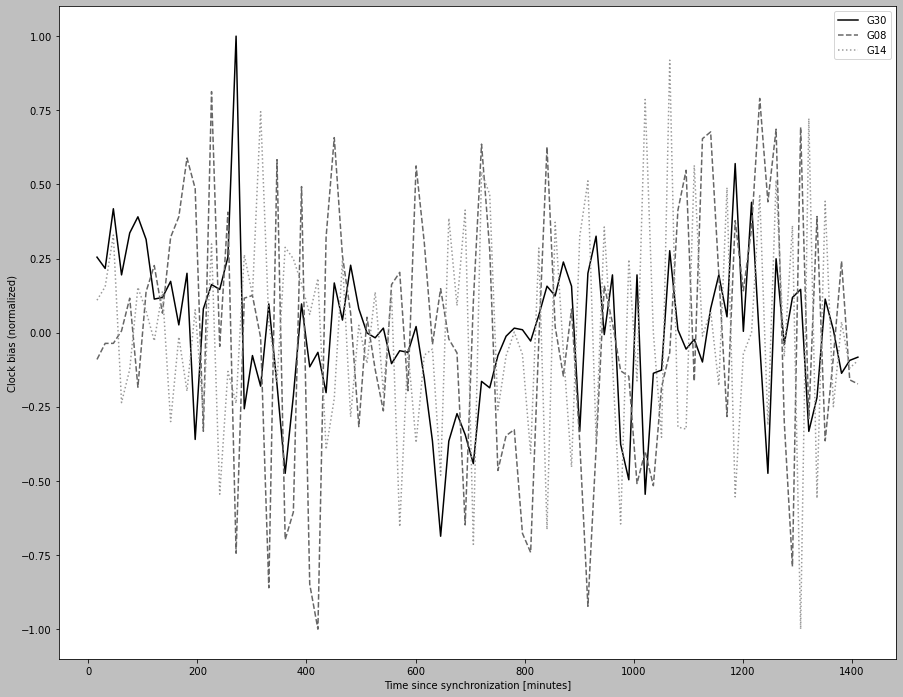

In [67]:
fig = plt.figure(figsize=(15, 12))
fig.tight_layout(pad=2, h_pad=2)
skip = 0
ax = fig.gca()
ax.ticklabel_format(useOffset=False) 

sats = [30, 8, 14]
l_types = ['solid', 'dashed', 'dotted']

for satellite, l_type in zip(sats, l_types):
    reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';')
    
    epochs = reference['Epoch'].to_numpy()[1:]
    epochs = np.arange(1, epochs.size*15, 15)
    bias_ref = reference['Clock_bias'].to_numpy()[1:]
    
    epochs = epochs[1:]
    bias_ref = np.diff(bias_ref)
    bias_ref -= np.mean(bias_ref)
    bias_ref /= max(np.max(bias_ref), abs(np.min(bias_ref)))
    
    ax.plot(epochs, bias_ref, label=f'G{satellite:02d}', ls=l_type)

ax.set_xlabel('Time since synchronization [minutes]')
ax.set_ylabel('Clock bias (normalized)')
plt.legend()
plt.show()

### Results of prediction for those satellites

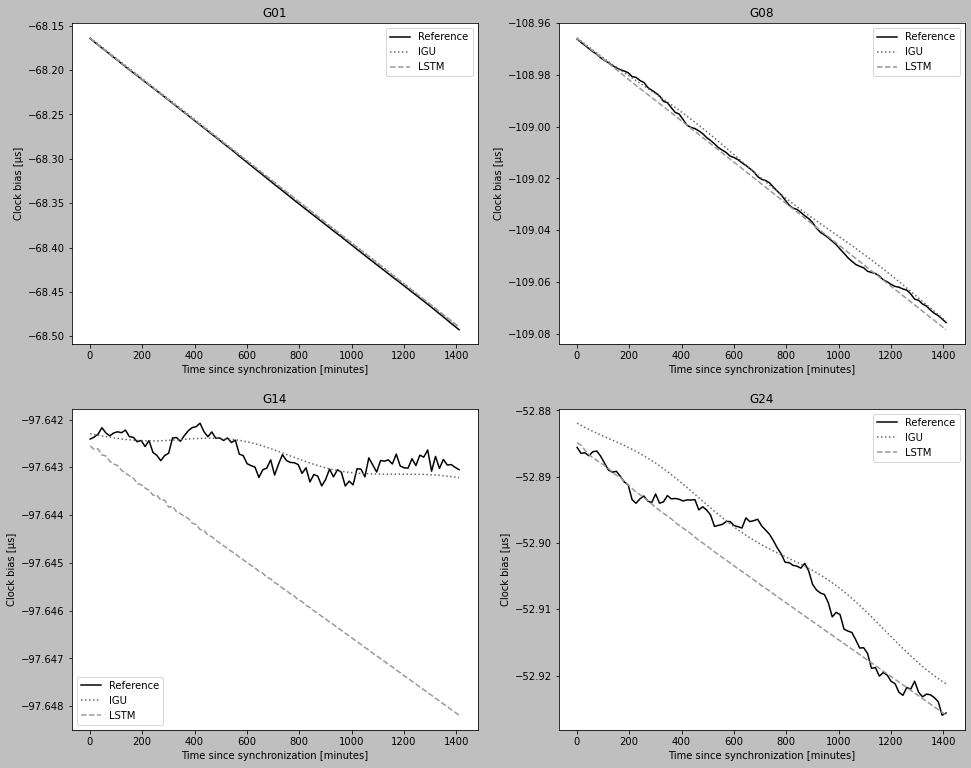

In [56]:
fig = plt.figure(figsize=(16, 13))
fig.tight_layout(pad=2, h_pad=2)
skip = 0
ax = None 

sats = [1, 8, 14, 24]

for subplot, satellite in enumerate(sats):
    reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';')
    igu = pd.read_csv(f'csv/igu_predicted/G{satellite:02d}.csv', sep=';')
    lstm = pd.read_csv(f'csv/lstm_predicted/G{satellite:02d}_no.csv', sep=';')
    
    epochs = reference['Epoch'].to_numpy()[1:]
    epochs = np.arange(1, epochs.size*15, 15)
    bias_ref = reference['Clock_bias'].to_numpy()[1:]
    bias_igu = igu['Clock_bias'].to_numpy()[1:]
    bias_lstm = lstm['Clock_bias'].to_numpy()[1:]
    
    ax = fig.add_subplot(2, 2, subplot+1)
    ax.title.set_text(f'G{satellite:02d}')
    ax.set_xlabel('Time since synchronization [minutes]')
    ax.set_ylabel('Clock bias [μs]')
    ax.set_yscale('linear')
    ax.ticklabel_format(useOffset=False)
    ax.plot(epochs, bias_ref/1000, label='Reference', ls='solid')
    ax.plot(epochs, bias_igu/1000, label='IGU', ls='dotted')
    ax.plot(epochs, bias_lstm/1000, label='LSTM', ls='dashed')
    ax.legend()
plt.show()

### Visualisation of squared errors for predictors, overview for all satellites

[]

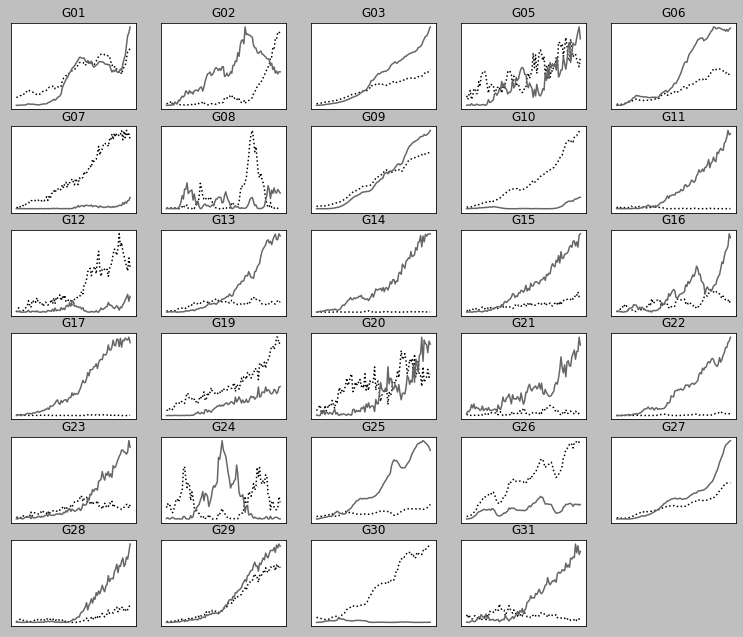

In [40]:
fig = plt.figure(figsize=(13, 13))
fig.tight_layout(pad=0.8)
skip = 0
ax = None 
for subplot, satellite in enumerate(range(1,31)):
    loaded = False
    satellite += skip
    reference = None
    igu = None
    lstm = None
    while not loaded and satellite < 32:
        try:
            reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';')
            igu = pd.read_csv(f'csv/igu_predicted/G{satellite:02d}.csv', sep=';')
            lstm = pd.read_csv(f'csv/lstm_predicted/G{satellite:02d}_no.csv', sep=';')
            loaded = True
        except Exception:
            skip += 1
            satellite += 1
    
    if reference is not None:
        epochs = reference['Epoch'].to_numpy()[1:]
        epochs = np.arange(1, epochs.size*15, 15)
        bias_ref = reference['Clock_bias'].to_numpy()[1:]
        bias_igu = igu['Clock_bias'].to_numpy()[1:]
        bias_lstm = lstm['Clock_bias'].to_numpy()[1:]
        
        ax = fig.add_subplot(7, 5, subplot+1)
        ax.title.set_text(f'G{satellite:02d}')
        ax.set_yscale('linear')
        ax.plot(epochs, (bias_igu-bias_ref)**2, label='IGU', ls='dotted')
        ax.plot(epochs, (bias_lstm-bias_ref)**2, label='LSTM', ls='solid')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        #ax.legend()
plt.plot()

### And now sqare errors for selected satellites

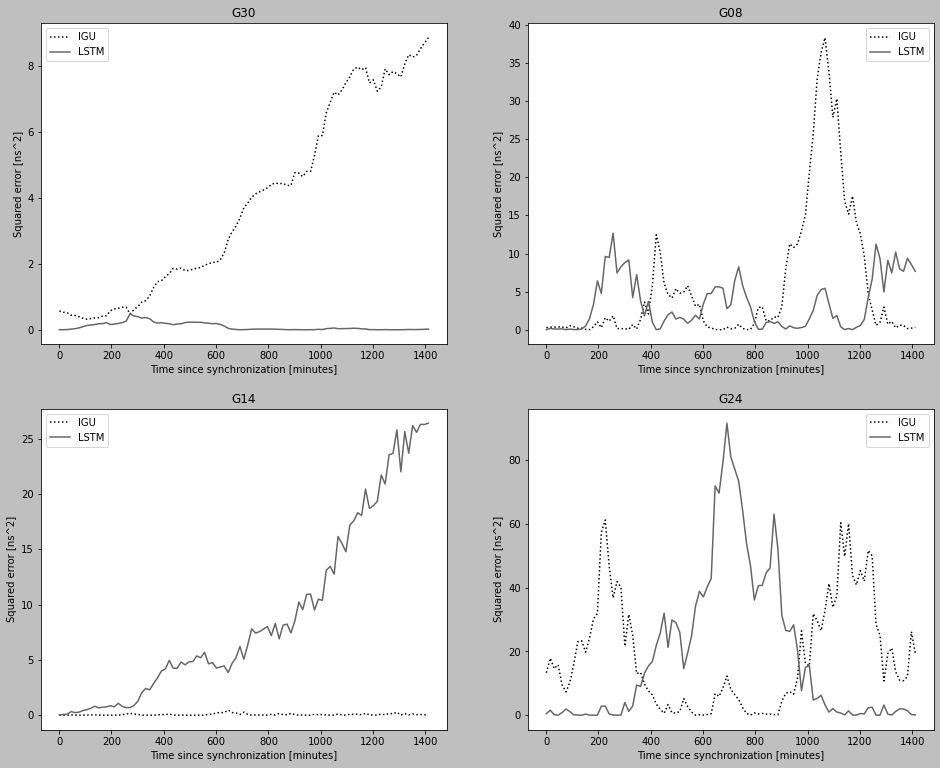

In [42]:
fig = plt.figure(figsize=(16, 13))
fig.tight_layout(pad=2, h_pad=2)
skip = 0
ax = None 

sats = [30, 8, 14, 24]

for subplot, satellite in enumerate(sats):
    reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';')
    igu = pd.read_csv(f'csv/igu_predicted/G{satellite:02d}.csv', sep=';')
    lstm = pd.read_csv(f'csv/lstm_predicted/G{satellite:02d}_no.csv', sep=';')
    
    epochs = reference['Epoch'].to_numpy()[1:]
    epochs = np.arange(1, epochs.size*15, 15)
    bias_ref = reference['Clock_bias'].to_numpy()[1:]
    bias_igu = igu['Clock_bias'].to_numpy()[1:]
    bias_lstm = lstm['Clock_bias'].to_numpy()[1:]
    
    ax = fig.add_subplot(2, 2, subplot+1)
    ax.title.set_text(f'G{satellite:02d}')
    ax.set_xlabel('Time since synchronization [minutes]')
    ax.set_ylabel('Squared error [ns^2]')
    ax.set_yscale('linear')
    ax.ticklabel_format(useOffset=False)
    ax.plot(epochs, (bias_igu-bias_ref)**2, label='IGU', ls='dotted')
    ax.plot(epochs, (bias_lstm-bias_ref)**2, label='LSTM', ls='solid')
    ax.legend()
plt.show()

### Finding breakepoint at which LSTM is worse then IGU
There is group of satellites for which we are better at first and then become worse. Here we try to find for which sattelites this brakeoff is at acceptable level

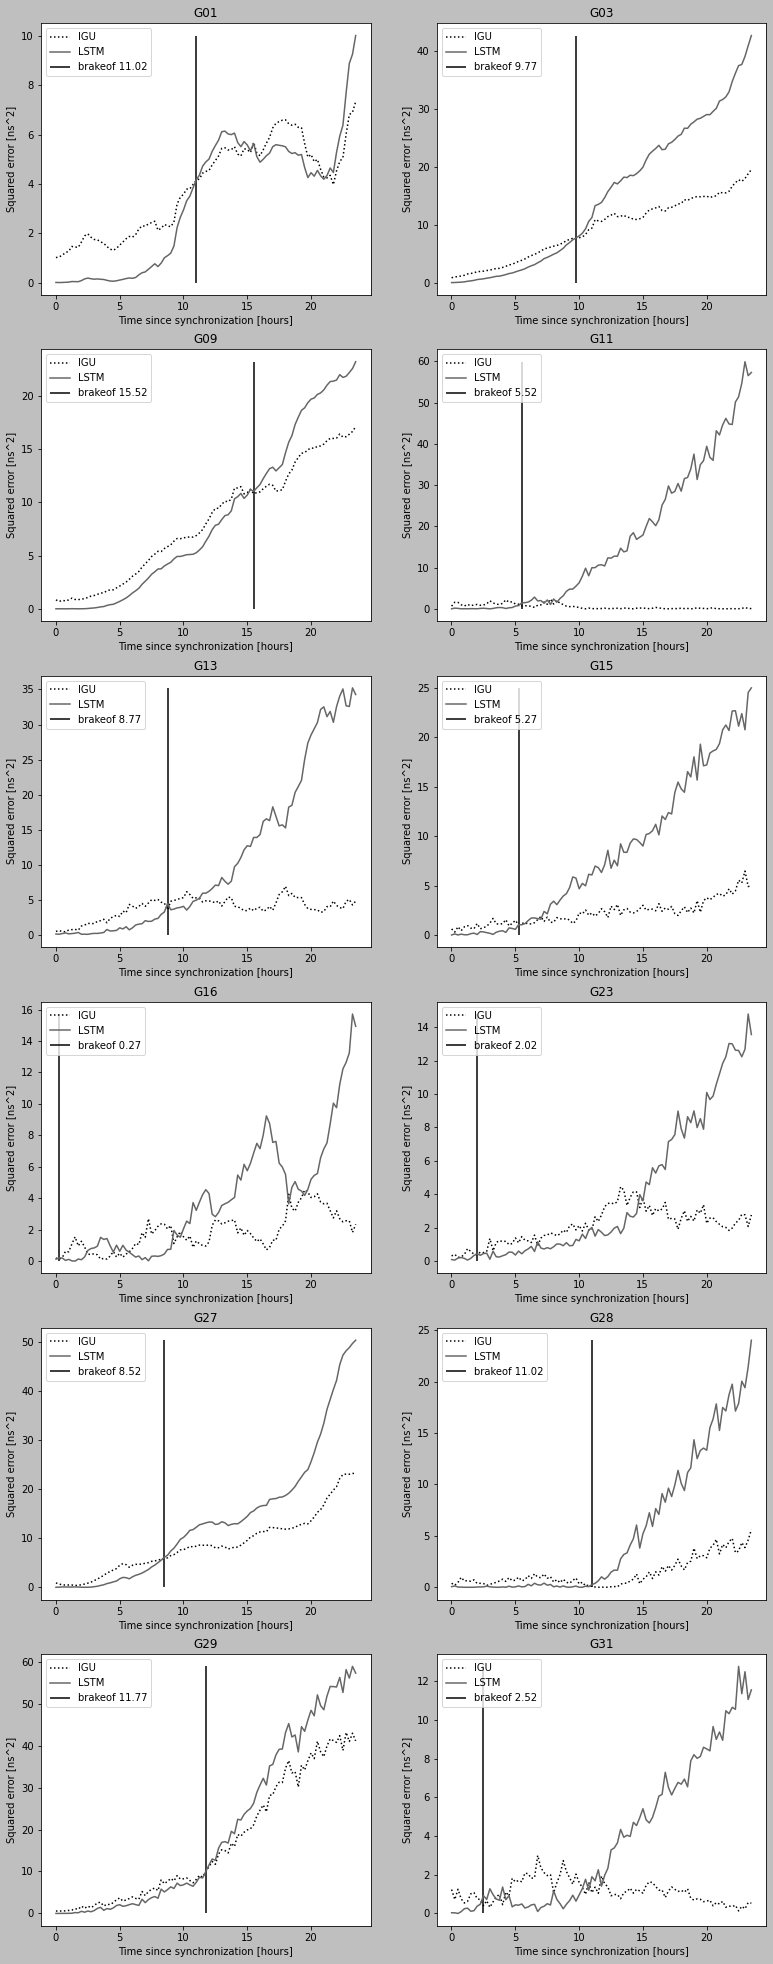

In [50]:
fig = plt.figure(figsize=(13, 35))
fig.tight_layout(pad=5, h_pad=5)
skip = 0
ax = None 

sats = [1, 3, 9, 11, 13, 15, 16, 23, 27, 28, 29, 31]

for subplot, satellite in enumerate(sats):
    reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';')
    igu = pd.read_csv(f'csv/igu_predicted/G{satellite:02d}.csv', sep=';')
    lstm = pd.read_csv(f'csv/lstm_predicted/G{satellite:02d}_no.csv', sep=';')
    
    epochs = reference['Epoch'].to_numpy()[1:]
    epochs = np.arange(1, epochs.size*15, 15)/60
    bias_ref = reference['Clock_bias'].to_numpy()[1:]
    bias_igu = igu['Clock_bias'].to_numpy()[1:]
    bias_lstm = lstm['Clock_bias'].to_numpy()[1:]
    
    err_igu = (bias_igu-bias_ref)**2
    err_lstm = (bias_lstm-bias_ref)**2
    err_max = max(err_igu.max(), err_lstm.max())
    brake_idx = epochs[np.argmax(err_lstm-err_igu>0)]
    
    ax = fig.add_subplot(6, 2, subplot+1)
    ax.title.set_text(f'G{satellite:02d}')
    ax.set_xlabel('Time since synchronization [hours]')
    ax.set_ylabel('Squared error [ns^2]')
    ax.set_yscale('linear')
    ax.ticklabel_format(useOffset=False)
    ax.plot(epochs, err_igu, label='IGU', ls='dotted')
    ax.plot(epochs, err_lstm , label='LSTM', ls='solid')
    plt.vlines(x = brake_idx, ymin=0, ymax=err_max, label = f'brakeof {brake_idx:.2f}')
    ax.legend()
plt.show()

### Only selected breakpoints that will be shown in article

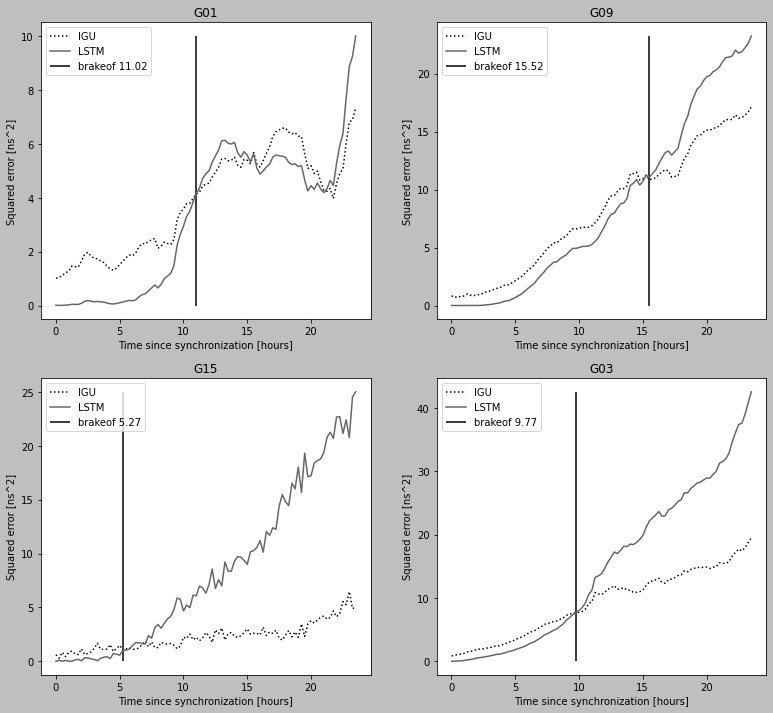

In [70]:
fig = plt.figure(figsize=(13, 12))
fig.tight_layout(pad=5, h_pad=5)
skip = 0
ax = None 

sats = [1, 9, 15, 3]

for subplot, satellite in enumerate(sats):
    reference = pd.read_csv(f'csv/reference/G{satellite:02d}.csv', sep=';')
    igu = pd.read_csv(f'csv/igu_predicted/G{satellite:02d}.csv', sep=';')
    lstm = pd.read_csv(f'csv/lstm_predicted/G{satellite:02d}_no.csv', sep=';')
    
    epochs = reference['Epoch'].to_numpy()[1:]
    epochs = np.arange(1, epochs.size*15, 15)/60
    bias_ref = reference['Clock_bias'].to_numpy()[1:]
    bias_igu = igu['Clock_bias'].to_numpy()[1:]
    bias_lstm = lstm['Clock_bias'].to_numpy()[1:]
    
    err_igu = (bias_igu-bias_ref)**2
    err_lstm = (bias_lstm-bias_ref)**2
    err_max = max(err_igu.max(), err_lstm.max())
    brake_idx = epochs[np.argmax(err_lstm-err_igu>0)]
    
    ax = fig.add_subplot(2, 2, subplot+1)
    ax.title.set_text(f'G{satellite:02d}')
    ax.set_xlabel('Time since synchronization [hours]')
    ax.set_ylabel('Squared error [ns^2]')
    ax.set_yscale('linear')
    ax.ticklabel_format(useOffset=False)
    ax.plot(epochs, err_igu, label='IGU', ls='dotted')
    ax.plot(epochs, err_lstm , label='LSTM', ls='solid')
    plt.vlines(x = brake_idx, ymin=0, ymax=err_max, label = f'brakeof {brake_idx:.2f}')
    ax.legend()
plt.show()